In [130]:
import time
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, rcParams
import seaborn as sns
sns.set()
from scipy import stats
from scipy import spatial
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

### Importing Data

In [131]:
df = pd.read_csv('dengue_features_train.csv')

In [132]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,05-10-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,25-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [133]:
df_sj = df[:936]
df_sj.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
931,sj,2008,13,25-03-2008,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,01-04-2008,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,08-04-2008,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,15-04-2008,0.00180,NaN,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,22-04-2008,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [134]:
df_iq = df[936:]
df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,01-07-2000,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,08-07-2000,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,15-07-2000,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,22-07-2000,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,29-07-2000,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


### Data Pre-Processing

Check null values.

Replace null values with 'interpolate' method.

In [135]:
df_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [136]:
df_sj = df_sj.interpolate()
df_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [137]:
df_sj.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1998.826923,26.503205,0.058096,0.066264,0.177090,0.166088,35.385304,299.157295,299.270520,295.103507,...,78.568907,35.385304,16.546255,2.514225,26.997940,6.753892,31.596207,22.593803,26.778846,34.180556
std,5.212076,15.021909,0.102660,0.091292,0.056926,0.055776,44.528272,1.236323,1.218688,1.567907,...,3.380444,44.528272,1.558857,0.498134,1.415530,0.835684,1.719618,1.505416,29.241411,51.381372
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,1994.000000,13.750000,0.004267,0.016487,0.138936,0.129457,0.000000,298.190714,298.291071,293.832857,...,76.246786,0.000000,15.225714,2.157143,25.814286,6.200000,30.600000,21.700000,6.900000,9.000000
50%,1999.000000,26.500000,0.058129,0.065950,0.176523,0.166900,20.775000,299.239286,299.378571,295.447143,...,78.670714,20.775000,16.832143,2.450000,27.214286,6.757143,31.700000,22.800000,17.800000,19.000000
75%,2003.000000,39.250000,0.111223,0.113512,0.211596,0.202264,52.125000,300.130714,300.223214,296.415714,...,80.947143,52.125000,17.854286,2.789286,28.175000,7.285714,32.800000,23.900000,35.525000,37.000000
max,2008.000000,53.000000,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,...,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


### Exploratory Data Analysis

Text(0.5, 1.0, 'Iquitos cases')

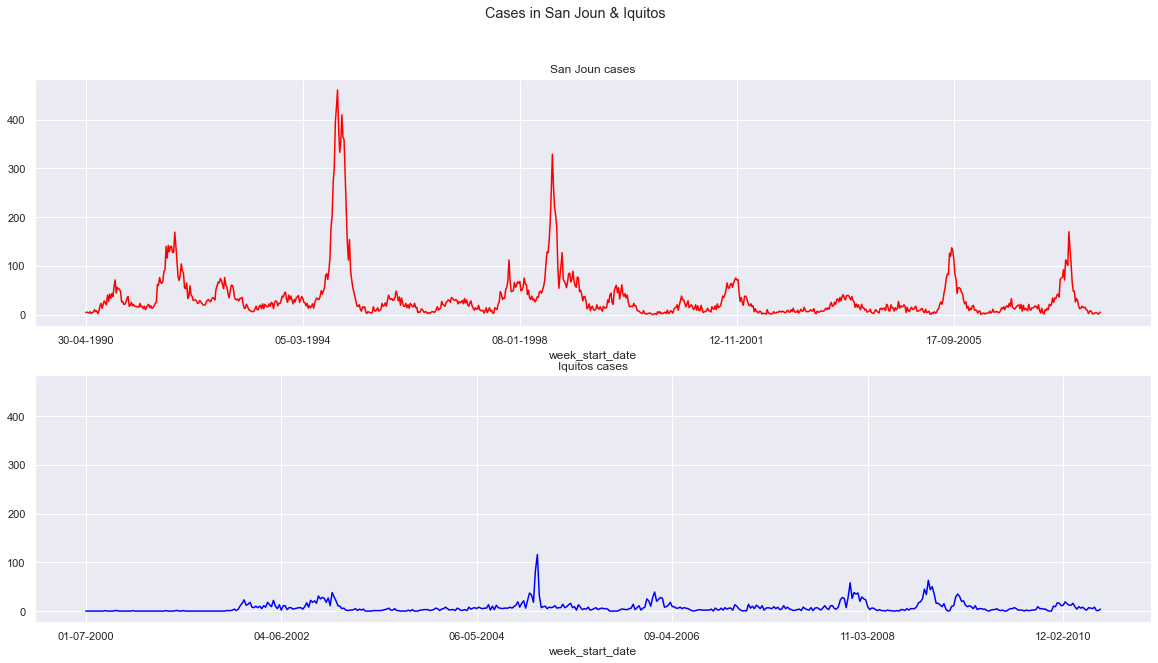

In [138]:
df_sj.set_index('week_start_date', inplace=True)
df_iq.set_index('week_start_date', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
fig.suptitle('Cases in San Joun & Iquitos')
fig.set_size_inches(20,10)
ax = df_sj['total_cases'].plot(ax=ax1, color = 'red');
ax1.set_title('San Joun cases')
ax = df_iq['total_cases'].plot(ax=ax2, color = 'blue');
ax2.set_title('Iquitos cases')

<ipython-input-140-c63e0f7af534>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_sj['total_cases'], model='additive', freq=365)


<Figure size 720x576 with 0 Axes>

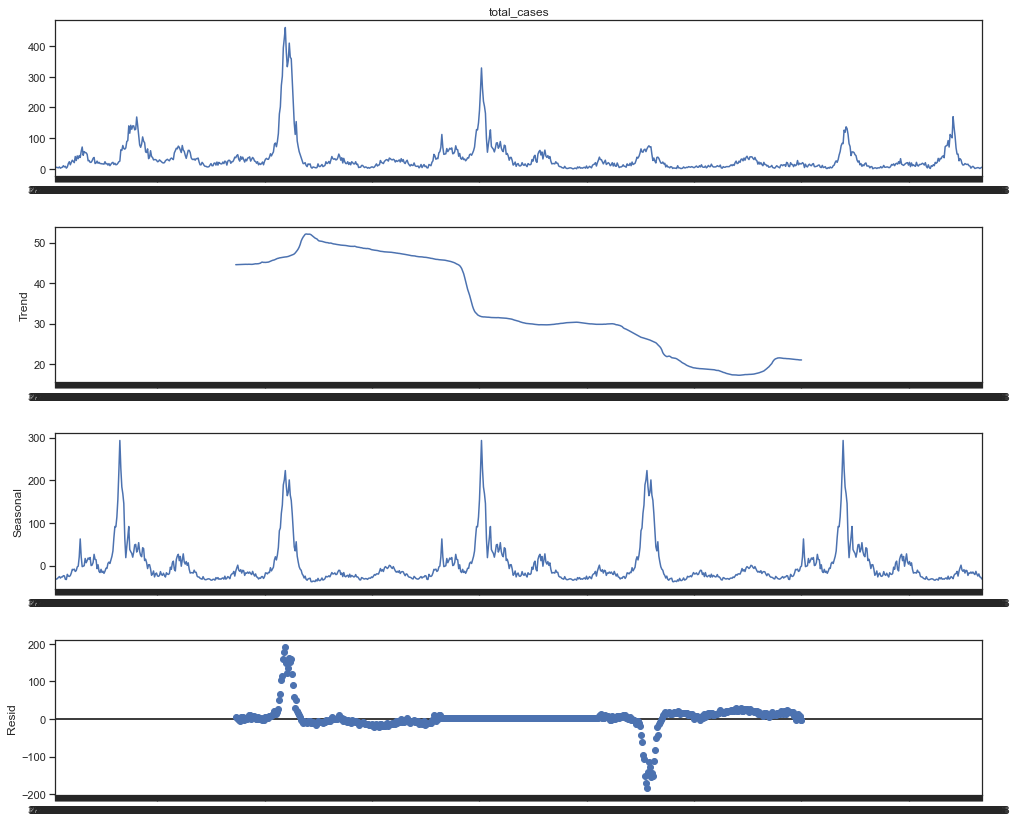

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sj['total_cases'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

Playing with a few frequency, the yearly pattern is very obvious and also we can see a downward trend. Which means this data is not stationary.

### Stationarize Data

What is stationay Data ? 

- The mean of the series should not be a function of time.

- The variance of the series should not be a function of time. This property is known as homoscedasticity.

- The covariance of the i th term and the (i + m) th term should not be a function of time. 

There are two ways you can check the stationarity of a time series. The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. For a more accurate assessment there is the **Dickey-Fuller test.** 

*- if the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary.*

#### Dickey-Fuller test

In [141]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='red',label='Original', linewidth = 0.5)
    mean = plt.plot(rolmean, color='blue', label='Rolling Mean', linestyle = 'dashed')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std', linestyle = 'dotted')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

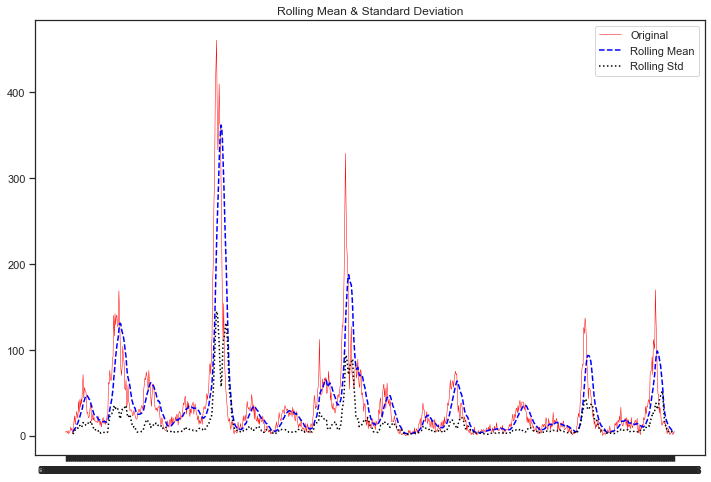

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (1%)           -3.437432e+00
Critical Value (5%)           -2.864666e+00
Critical Value (10%)          -2.568435e+00
dtype: float64


In [142]:
test_stationarity(df_sj['total_cases'])

The smaller p-value, the more likely it's stationary. Here our p-value is 5.147319e-09. It's actually not bad, if we use a 5% Critical Value(CV), this series would be considered stationary. But as we just visually found an downward trend, we want to be more strict, we use 1% critical value. 
Applying differencing method.

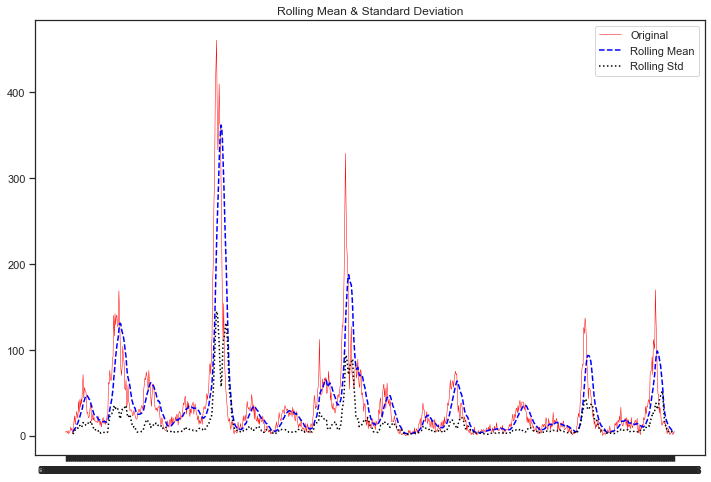

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (1%)           -3.437432e+00
Critical Value (5%)           -2.864666e+00
Critical Value (10%)          -2.568435e+00
dtype: float64


In [169]:
#first_diff = df_sj.total_cases - df_sj.total_cases.shift(1)
first_diff = df_sj.total_cases
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

#### ACF and PACF Plots 

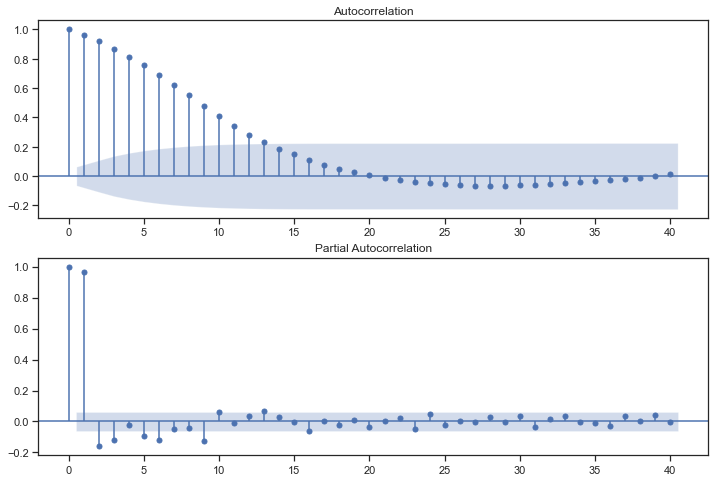

In [170]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sj.total_cases, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_sj.total_cases, lags=40, ax=ax2)# , lags=40

### Model Building

Determining p, d, q values.

- From the above plots, d = 0, because no differencing is peformed
- AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 2 lags the AR is significant. Which means, we can use p = 3
- MA model might be investigated first with lag length selected from the ACF or via empirical investigation. In our case, it's clearly there is no sudden change in ACF. Which means, we can use q < significant value

In [262]:
arima_mod6 = sm.tsa.ARIMA(first_diff, (3,0,2)).fit(disp=False)
print(arima_mod6.summary())

C:\Users\Sai Teja\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sai Teja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

                              ARMA Model Results                              
Dep. Variable:            total_cases   No. Observations:                  936
Model:                     ARMA(3, 2)   Log Likelihood               -3738.042
Method:                       css-mle   S.D. of innovations             13.106
Date:                Mon, 18 Oct 2021   AIC                           7490.083
Time:                        18:53:35   BIC                           7523.974
Sample:                             0   HQIC                          7503.005
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                33.8672      6.382      5.306      0.000      21.358      46.377
ar.L1.total_cases     0.8535      0.039     21.633      0.000       0.776       0.931
ar.L2.total_cases     0.

#### Analyze the result
To see how our first model perform, we can plot the residual distribution. See if it's normal dist. And the ACF and PACF. For a good model, we want to see the residual is normal distribution. And ACF, PACF has not significant terms.



NormaltestResult(statistic=283.2207199227295, pvalue=3.157927014513686e-62)


C:\Users\Sai Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


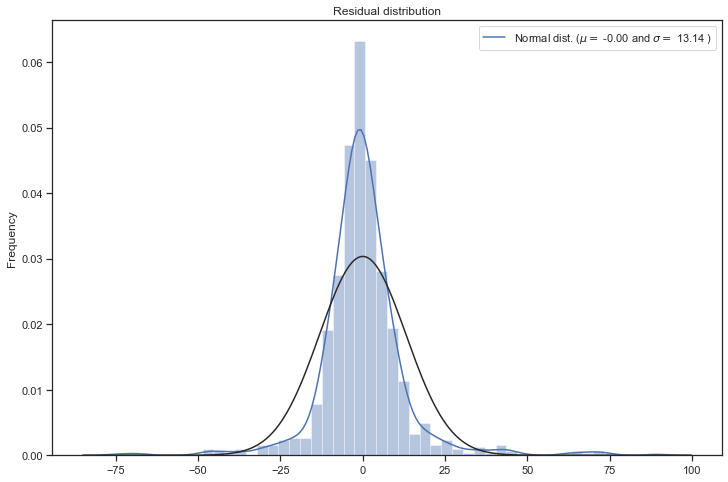

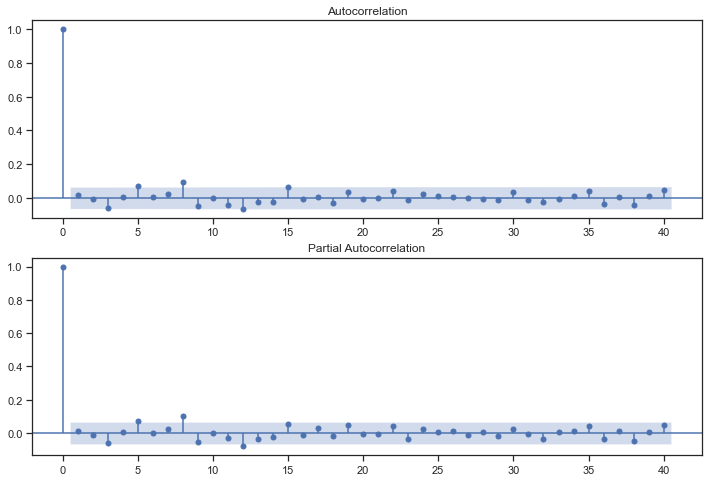

In [263]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

To see how our first model perform, we can plot the residual distribution. See if it's normal dist. And the ACF and PACF. For a good model, we want to see the residual is normal distribution. And ACF, PACF has not significant terms.



### Prediction 

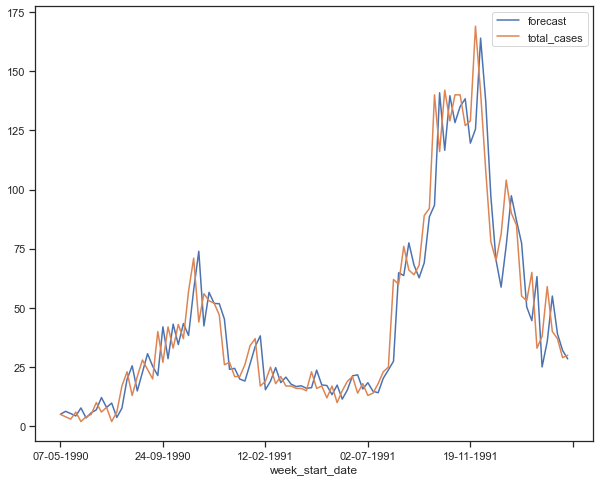

In [264]:
df_sj['forecast'] = arima_mod6.predict()
arima_mod6.plot_predict(start = 1, end = 100, dynamic = False, alpha = 0.01)
plt.show()

<AxesSubplot:xlabel='week_start_date'>

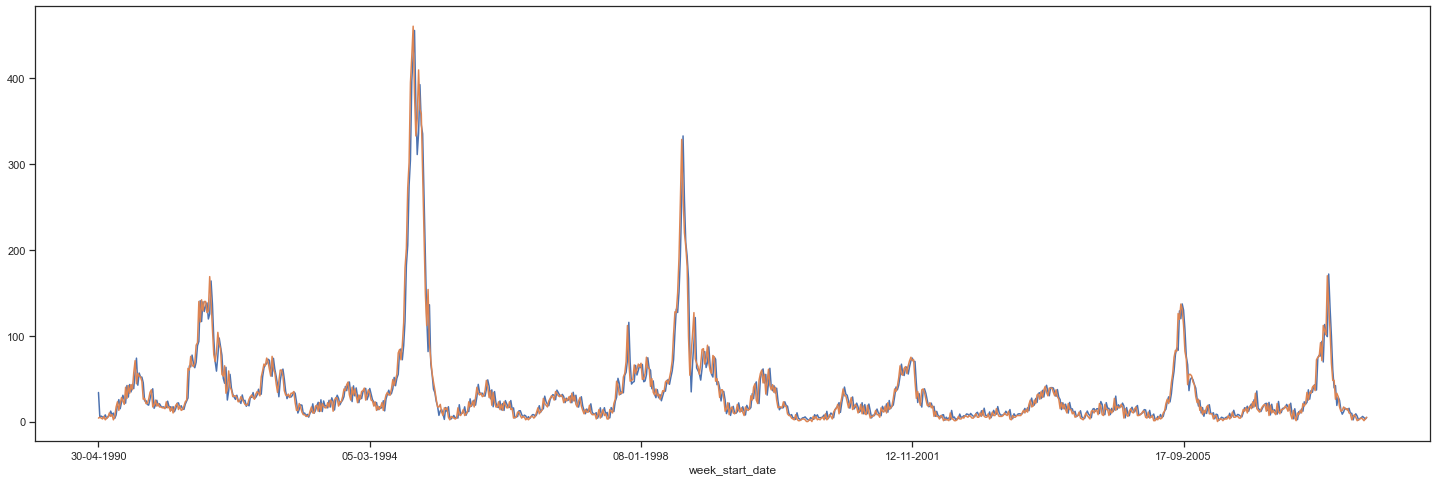

In [265]:
df_sj['forecast'] = arima_mod6.predict()  
df_sj['forecast'].plot(figsize=(25, 8))
df_sj['total_cases'].plot(figsize=(25, 8))

### Evaluation

In [266]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [267]:
smape_kun(df_sj['forecast'],df_sj['total_cases'])

MAPE: 34.74 % 
SMAPE: 34.51 %
